In [168]:
import pandas as pd
import matplotlib as plt

# Graded Assignment

## Data Preparation

The data we're going to use is the invoice summary of a transaction data of an online retail shop provided from UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/datasets/online+retail). All the transactions occurring between end of 2010 to end of 2011 for a UK-based and registered non-store online retail:

- `InvoiceNo`: unique invoice ID
- `UniqueItem`: number of unique item bought per transaction/invoice
- `CustomerID`: customer identification
- `Country`: customer's address country
- `InvoiceDate`: date of transaction

In [169]:
invoice = pd.read_csv('data_input/retail_invoice.csv',index_col='InvoiceNo')
invoice.head()

,UniqueItem,TotalPrice,CustomerID,Country,InvoiceDate
InvoiceNo,,,,,
536365,7,139.12,17850.0,United Kingdom,2010-12-01 08:26:00
536366,2,22.20,17850.0,United Kingdom,2010-12-01 08:28:00
536367,12,278.73,13047.0,United Kingdom,2010-12-01 08:34:00
536368,4,70.05,13047.0,United Kingdom,2010-12-01 08:34:00
536369,1,17.85,13047.0,United Kingdom,2010-12-01 08:35:00


Before you go any further, check the data `dtypes` and make sure all of our columns have stored in the correct data type!

In [170]:
## Your code here
#invoice.dtypes

invoice['InvoiceDate'] = pd.to_datetime(invoice['InvoiceDate'])
invoice.dtypes

UniqueItem              int64
TotalPrice            float64
CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
dtype: object

The company is planning for expansion and you were asked to observe their overseas market. Using any subsetting method you've learned, subset `invoice` by `Country` to get only **transactions from the countries outside the United Kingdom** and name it **`invoice_int`**!

In [171]:
## Your code here
invoice_int = invoice[invoice['Country'] != 'United Kingdom']
invoice_int

,UniqueItem,TotalPrice,CustomerID,Country,InvoiceDate
InvoiceNo,,,,,
536370,20,855.86,12583.0,France,2010-12-01 08:45:00
536389,14,358.25,12431.0,Australia,2010-12-01 10:03:00
536403,2,192.60,12791.0,Netherlands,2010-12-01 11:27:00
536527,15,261.48,12662.0,Germany,2010-12-01 13:04:00
536532,73,1919.14,12433.0,Norway,2010-12-01 13:24:00
...,...,...,...,...,...
558045,31,634.74,12615.0,France,2011-06-24 13:35:00
558046,30,542.20,NaN,EIRE,2011-06-24 13:47:00
558047,1,542.20,NaN,EIRE,2011-06-24 13:51:00


## Data Wrangling & Visualization

**Task 1**:  
Using the `invoice_int` data, create a bar chart which shows the company **top 5** largest overseas market by **total** revenue (`TotalPrice`)!

*Hint*:
- Perform a group by aggregation to get the total (`sum`) revenue (`TotalPrice`) by each country and subset only top 5 countries with the highest value.
- Pair the dataframe with `.plot()` to get the barchart.

<AxesSubplot:xlabel='Country'>

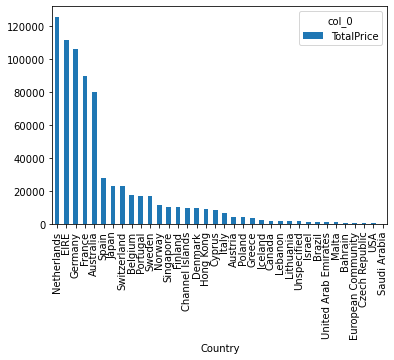

In [172]:
## Your code here
pd.crosstab(index=invoice_int['Country'], 
            columns='TotalPrice', 
            values=invoice_int['TotalPrice'], 
            aggfunc=sum).sort_values(by='TotalPrice', ascending=False).plot.bar()

In [173]:
pd.crosstab(index=invoice_int['Country'], 
            columns='TotalPrice', 
            values=invoice_int['TotalPrice'], 
            aggfunc=sum).sort_values(by='TotalPrice', ascending=False).head()

col_0,TotalPrice
Country,
Netherlands,125816.11
EIRE,111514.90
Germany,106223.19
France,89619.32
Australia,79806.79


1. When creating a bar chart, we should also consider what order in which we will plot the bars. Sorting the bars by the right order reduce the burden on the reader to make the comparisons. What ordering do you think the bars within the *Task 1* barchart should be presented?
    - [ ] by Country: `sort_values('Country', ascending = False).plot(kind='bar')`
    - [ ] by Country: `sort_values('Country').plot(kind='barh')`
    - [X] by Value: `sort_values('TotalPrice', ascending=False).plot(kind='bar')`
    - [ ] by Value: `sort_values('TotalPrice').plot()`

2. From the chart you just created, which of the following is **not** among the top 5 largest market outside the United Kingdom?
    - [ ] Netherland
    - [ ] EIRE
    - [ ] Germany
    - [X] Spain 

**Task 2**:  
A common way to inspecting data statistically is by using boxplot, a handy visualization tools that provide five number summary for your data. 

The boxplot below compares the monthly summary of each overseas market total revenue;
- Each data point represents the country total revenue (`TotalPrice`)
- The x and y axis represents the monthly period and total monthly revenue respectively.

![](assets/task2.png)

3. From the boxplot above, which of the following statements is **TRUE**?
    - [ ] The highest market revenue in January 2011 was around 18,000 USD
    - [ ] In 2011, the total monthly revenue in February was higher than March
    - [ ] The median revenue appeared to be highest in May 2011.
    - [X] In 2011, there were more countries that happen to be outliers in April than June.
    
    
4. Try to recreate the boxplot above by fill in the blank codes:

```
invoice_int['InvoiceMonth'] = invoice_int['InvoiceDate'].dt.to_period('M')

invoice_monthly = invoice_int.\
groupby(_______).\
agg({'TotalPrice': 'sum'})

invoice_monthly.\
boxplot(column = _______, by=_______)
```
   - [ ] `['Country']`, `'TotalPrice'`, `'Country'`
   - [ ] `['InvoiceMonth']`, `'TotalPrice'`, `'InvoiceMonth'`
   - [X] `['Country','InvoiceMonth']`, `'TotalPrice'`, `'InvoiceMonth'`
   - [ ] `['InvoiceMonth','Country']`, `'InvoiceMonth'`, `'TotalPrice'`

<ipython-input-174-c4cb0b06323d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoice_int['InvoiceMonth'] = invoice_int['InvoiceDate'].dt.to_period('M')


<AxesSubplot:title={'center':'TotalPrice'}, xlabel='InvoiceMonth'>

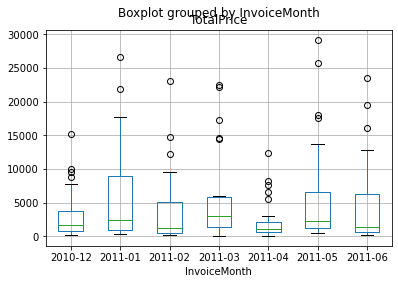

In [174]:
## Your code here
invoice_int['InvoiceMonth'] = invoice_int['InvoiceDate'].dt.to_period('M')
invoice_monthly = invoice_int.groupby(['Country','InvoiceMonth']).agg({'TotalPrice': 'sum'})
invoice_monthly.boxplot(column = 'TotalPrice', by='InvoiceMonth')

**Task 3**:

Based on the previous boxplot, we found that in June 2011, there were 3 countries with unusually high `TotalPrice`. By fill in the blank codes below, you could identify those outliers by subsetting `invoice_monthly` with the maximum value/upper whisker of the boxplot:

```
june_invoice = invoice_monthly.xs(key = _______, level= _______)
june_outliers = june_invoice[june_invoice['TotalPrice'] > 13000]

june_outliers
```

5. Which countries are **NOT** included in `june_outliers` table/dataframe?
   - [X] Germany
   - [ ] France
   - [ ] Australia
   - [ ] EIRE

In [165]:
## Your code here:
#invoice_monthly
june_invoice = invoice_monthly.xs('2011-06', level=1)
june_outliers = june_invoice[june_invoice['TotalPrice'] > 13000]
june_outliers

,TotalPrice
Country,
Australia,23426.81
EIRE,19551.94
France,16012.89


6. Copy down the code below to create a dataframe of quarterly summary of total revenue from the countries in `june_outliers`: 
```
invoice_int['Quarter'] = invoice_int['InvoiceDate'].dt.to_period('Q')
invoice_topq = invoice_int.groupby(['Country','Quarter']).\
                 agg({'TotalPrice' : 'sum'}).\
                 loc[june_outliers.axes[0],]
invoice_topq
```
Which of the following code shows the *most efficient* **grouped bar chart** to compare **quarterly revenue growth** in `invoice_topq`?    
    - [ ] `invoice_topq.plot(kind='bar')`
    - [X] `invoice_topq.unstack().plot(kind = 'bar',stacked=True)`
    - [ ] `invoice_topq.unstack(level = 'Country').plot(kind='barh')`
    - [ ] `invoice_topq.unstack(level = 'Country').plot(kind='bar')`

In [181]:
## Your code here:
invoice_int['Quarter'] = invoice_int['InvoiceDate'].dt.to_period('Q')
invoice_topq = invoice_int.groupby(['Country','Quarter']).\
                 agg({'TotalPrice' : 'sum'}).\
                 loc[june_outliers.axes[0],]
invoice_topq


<ipython-input-181-08aadea07209>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoice_int['Quarter'] = invoice_int['InvoiceDate'].dt.to_period('Q')


TotalPrice
Country   Quarter            
Australia 2010Q4      1032.85
          2011Q1     40937.12
          2011Q2     37836.82
EIRE      2010Q4     10033.26
          2011Q1     56350.44
          2011Q2     45131.20
France    2010Q4      9616.31
          2011Q1     40845.63
          2011Q2     39157.38

<AxesSubplot:xlabel='Country'>

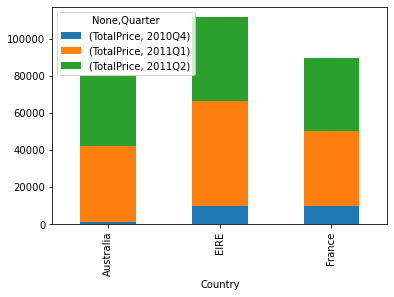

In [182]:
invoice_topq.unstack().plot(kind = 'bar',stacked=True)

<AxesSubplot:xlabel='Quarter'>

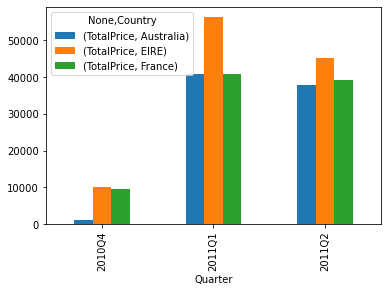

In [183]:
invoice_topq.unstack(level = 'Country').plot(kind='bar')